In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [60]:
df = pd.read_csv('../data/loans_full_schema.csv')

In [61]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

<AxesSubplot:xlabel='public_record_bankrupt', ylabel='interest_rate'>

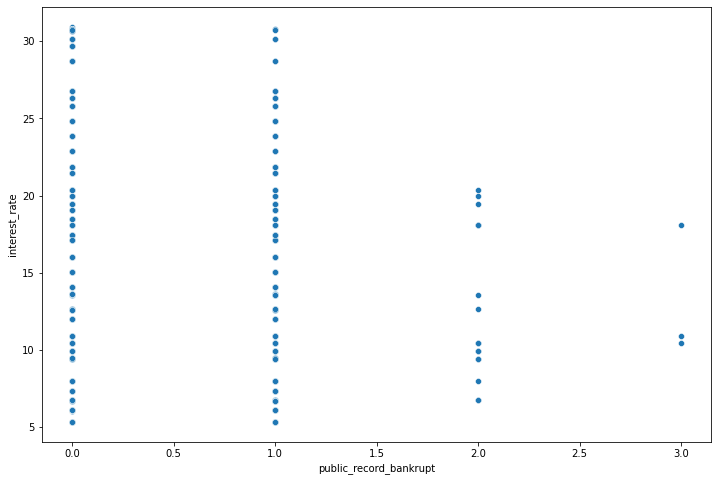

In [63]:
plt.figure(figsize = (12,8))
sns.scatterplot(data=df, x="public_record_bankrupt", y="interest_rate")

In [64]:
np.unique(df['public_record_bankrupt'])

array([0, 1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='public_record_bankrupt', ylabel='count'>

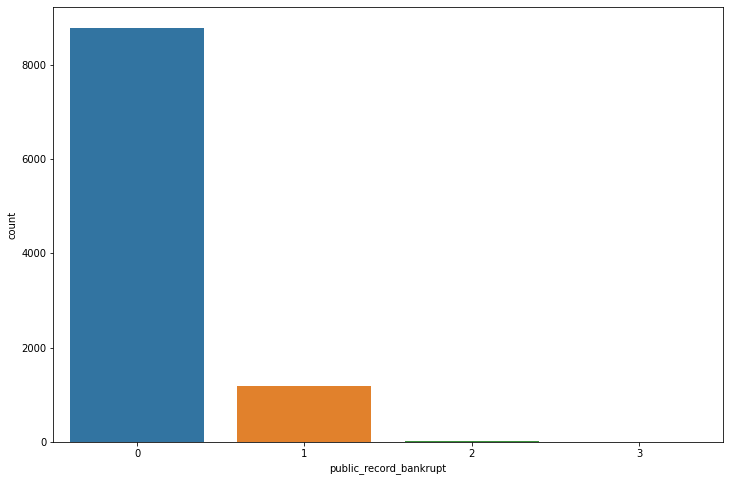

In [65]:
plt.figure(figsize = (12,8))
sns.countplot(x="public_record_bankrupt", data=df)

In [66]:
mod = sm.ols('interest_rate ~ public_record_bankrupt', data=df)

In [67]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     22.59
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           2.04e-06
Time:                        21:34:30   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12

In [68]:
print(res.params)

Intercept                 12.340344
public_record_bankrupt     0.704197
dtype: float64


In [69]:
b0_val = res.params['Intercept']
print(b0_val)

12.340344467086297


In [70]:
b1_val = res.params['public_record_bankrupt']
print(b1_val)

0.704196550191649


In [71]:
print("R2: ", res.rsquared)

R2:  0.0022540251330832595


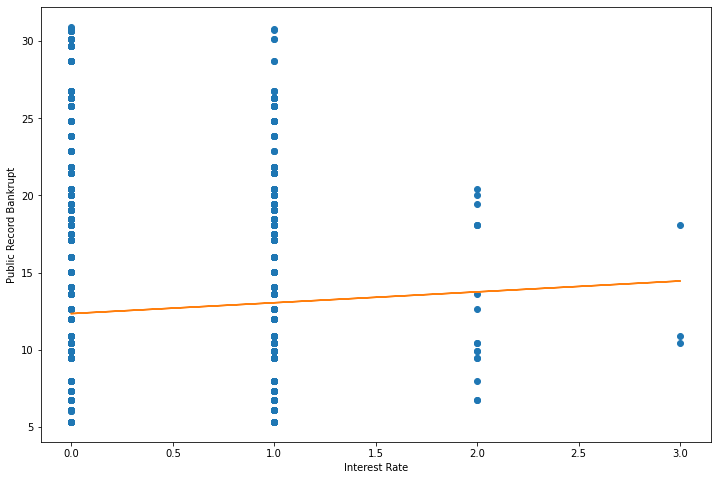

In [72]:
plt.figure(figsize = (12,8))

x = np.array(df['public_record_bankrupt'])
y = np.array(df['interest_rate'])
             
plt.plot(x, y, 'o')

plt.plot(x, b1_val * x + b0_val)

plt.xlabel("Interest Rate")
plt.ylabel("Public Record Bankrupt")

plt.show()

In [73]:
np.unique(df['verified_income'])

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [74]:
mod = sm.ols('interest_rate ~ verified_income', data=df)

In [75]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Fri, 21 Jan 2022   Prob (F-statistic):          8.92e-134
Time:                        21:34:30   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Reference Level
- When we fit a Categorial variable with k Levels, the software provided coefficients for (k-1) Levels

In [76]:
print(res.params)

Intercept                             11.099457
verified_income[T.Source Verified]     1.416021
verified_income[T.Verified]            3.254289
dtype: float64


In [77]:
b0_val = res.params['Intercept']
print(b0_val)

11.099457429048426


In [78]:
print("R2: ", res.rsquared)

R2:  0.05944952137763426


### Multiple Linear Regression Equation

$\hat y = \beta_0 + \beta_1x_1 + \beta_2x_2 +...+ \beta_nx_n$

In [79]:
b1_val = res.params['verified_income[T.Source Verified]']
print(b1_val)

1.4160211909711065


In [80]:
b2_val = res.params['verified_income[T.Verified]']
print(b2_val)

3.2542892958424696


### One Prediction

In [81]:
# Income and Income Source are Verified
y_pred = b0_val + b1_val * 1 + b2_val * 1
print(y_pred)

15.769767915862001


In [82]:
# both Income and Income Source are Not Verified
y_pred = b0_val + b1_val * 0 + b2_val * 0
print(y_pred)

11.099457429048426


In [83]:
# Income Source is Verified
y_pred = b0_val + b1_val * 1 + b2_val * 0
print(y_pred)

12.515478620019532


In [84]:
# Income is Verified
y_pred = b0_val + b1_val * 0 + b2_val * 1
print(y_pred)

14.353746724890897


### But why the Interest Rate is higher for Income Verified?
- Poor Credit?

#### The riskier the loan the higher the interest rate

### Including and assessing many variables in a model

In [85]:
"""
verified_income
public_record_bankrupt
debt_to_income
public_record_bankrupt
term
issue_month
"""

'\nverified_income\npublic_record_bankrupt\ndebt_to_income\npublic_record_bankrupt\nterm\nissue_month\n'

In [86]:
mod = sm.ols('interest_rate ~ verified_income + public_record_bankrupt + debt_to_income + public_record_bankrupt + term + issue_month', data=df)

In [87]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     317.0
Date:                Fri, 21 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:34:31   Log-Likelihood:                -29204.
No. Observations:                9976   AIC:                         5.842e+04
Df Residuals:                    9968   BIC:                         5.848e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Adjusted R2

#### Before
$R^2 = \frac{s_y^2 - s_{res}^2}{s_y^2}$
$= 1 - \frac{s_{res}^2}{s_y^2}$


#### After
$R_{adj}^2 = 1 - \frac{s_{res}^2}{s_y^2} \times \frac{n-1}{n-k-1}, \text{where n is the number of cases to fit the model and k is the number of predictor variables}$

$\text{A categorical predictor with p levels, contributes p - 1 to the number of variables above}$